This notebook created to calculate H2 molecule using Hartree-Fock method in STO-3G basis set. The programming code is written in python has been inpired by the FORTRAN program in the book "Modern Quantum Chemistry" by Szabo & Ostlund. Readers may refer to this book for the details. \\
The default example demonstrates the HF calculation for H_He+ diatomic molecule, but can be used to calculate any general two-electron diatomic molecule.  

In [57]:
import math                     # library for math constants
import numpy as np              # library for arrays
import matplotlib.pyplot as plt # library for drawing plots

# Molecule definition
The diatomic molecule is defined by the atom charges and distance between nuclei:

In [58]:
ZA = 1.0 # He
ZB = 1.0 # H
R = 1.4 # Angstroms

# STO-NG basis set review
Let's consider the minimal STO-NG basis set. The STO-NG is a Pople basis set that fitts Slater type orbitals (**STO**) using several primitive Gaussian (**G**) functions.

---


The 1s Slater type orbital function looks like:
\begin{align}
\psi_{1s}^{STO}=(\frac{\zeta^{3}}{\pi})^{\frac{1}{2}} e^{-\zeta r}.
\end{align}\
Let's plot it below.


---


What happens if ZETA ($\zeta$) is increased from 1.0 to 1.5?

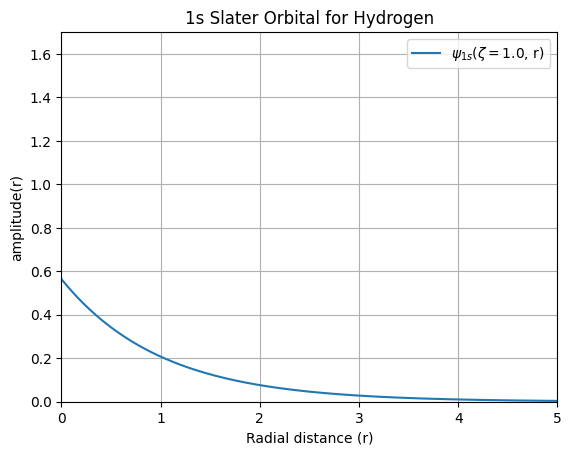

In [59]:
# Parameters for hydrogen 1s orbital
ZETA = 1.0       # <-- try to change to 1.5 or 2.0

# Radial distance
r = np.linspace(0, 5, 500)

# 1s Slater orbital function
psi_1s = math.sqrt(ZETA**3/math.pi)*np.exp(-ZETA * r)

# Plot the function
plt.plot(r, psi_1s, label='$\psi_{1s}(\zeta=$'+str(ZETA)+', r)')
plt.title('1s Slater Orbital for Hydrogen')
plt.xlim(0, 5)
plt.ylim(0, 1.7)
plt.xlabel('Radial distance (r)')
plt.ylabel('amplitude(r)')
plt.legend()
plt.grid(True)
plt.show()

The Slater orbital resembles the known shape of the wavefunction for hydrogen atom and can correctly model the orbital overlap on the long distances.
However, the **Slater orbitals are computationally expensive to integrate**. **Gaussian functions (GF) are easier to integrate**, so we will use the combination of them to fit the Slater function.

---


The contracted Gaussian function (**CGF**), composed from the normalized primitive gaussian functions, is:
\begin{align}
\phi_{STO-NG}^{CGF}=\sum_{i=1}^{N} c_{i} \varphi_{i}^{GF}, \\
\varphi_{i}^{GF}=(\frac{2\alpha_{i}\zeta}{\pi})^{\frac{3}{4}}e^{-\alpha_{i} r^{2}}.
\end{align}


---


Let's define the exponents $\alpha_{i}$ and contraction coefficients $c_{i}$ for the minimal Pople STO-NG basis set (this data is optimized by least square fitting procedure):

In [60]:
                #  1 (STO-1G), 2(STO-2G), or 3(STO-3G)
expon = np.array([[0.270950,   0.151623,     0.109818],  # alpha (zeta=1.0)
                  [0.0,        0.851819,     0.405771],
                  [0.0,        0.0,          2.22766]])
coeff = np.array([[1.0,        0.678914,     0.444635],  # c     (zeta=1.0)
                  [0.0,        0.430129,     0.535328],
                  [0.0,        0.0,          0.154329]])

Now, let's compare how well STO-1G, STO-2G, and STO-3G can approximate Slater function. Which **STO-NG** is better?

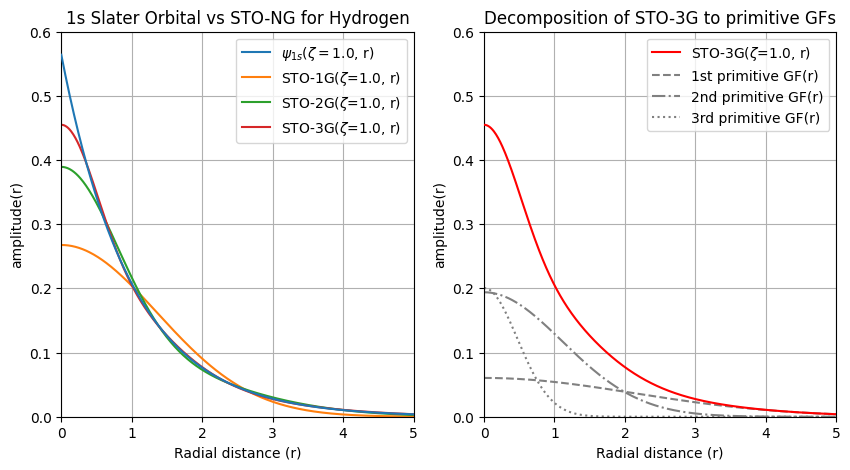

In [61]:
ZETA = 1.0
sto_ng = np.zeros([3,len(r)])

for i in range(3):
    for j in range(3):
        sto_ng[i,:] = sto_ng[i,:] + coeff[j,i]*(2*expon[j,i]*ZETA/math.pi)**0.75*np.exp(-expon[j,i] * r**2)

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,5))

ax1.plot(r, psi_1s, label='$\psi_{1s}(\zeta=$'+str(ZETA)+', r)', zorder=4 )
ax1.plot(r, sto_ng[0,:], label='STO-1G($\zeta$='+str(ZETA)+', r)')
ax1.plot(r, sto_ng[1,:], label='STO-2G($\zeta$='+str(ZETA)+', r)')
ax1.plot(r, sto_ng[2,:], label='STO-3G($\zeta$='+str(ZETA)+', r)')
ax1.set_title('1s Slater Orbital vs STO-NG for Hydrogen')
ax1.set_xlim(0, 5)
ax1.set_ylim(0, 0.6)
ax1.set_xlabel('Radial distance (r)')
ax1.set_ylabel('amplitude(r)')
ax1.legend()
ax1.grid(True)

ax2.plot(r, sto_ng[2,:], label='STO-3G($\zeta$='+str(ZETA)+', r)', color='red', zorder=4)
ax2.plot(r, coeff[0,2]*(2*expon[0,2]*ZETA/math.pi)**0.75 * np.exp(-expon[0,2] * r**2), label='1st primitive GF(r)', color='gray', ls='--')
ax2.plot(r, coeff[1,2]*(2*expon[1,2]*ZETA/math.pi)**0.75 * np.exp(-expon[1,2] * r**2), label='2nd primitive GF(r)', color='gray', ls='-.')
ax2.plot(r, coeff[2,2]*(2*expon[2,2]*ZETA/math.pi)**0.75 * np.exp(-expon[2,2] * r**2), label='3rd primitive GF(r)', color='gray', ls=':')
ax2.set_title('Decomposition of STO-3G to primitive GFs')
ax2.set_xlim(0, 5)
ax2.set_ylim(0, 0.6)
ax2.set_xlabel('Radial distance (r)')
ax2.set_ylabel('amplitude(r)')
ax2.legend()
ax2.grid(True)

plt.show()

Now, let's choose which STO-NG basis (1G, 2G, or 3G) we want to use. Also, we should **scale the basis exponents and contraction coefficient** for each atom according the $\zeta$ parameter, such as $\alpha'=\alpha(\zeta=1.0)*\zeta^{2}$. Note that in molecule system $\zeta$ will be greater than 1.0 because electron density adjusts to the presence of other electrons and nuclei.

In [62]:
N = 3          # 1, 2, or 3 gaussians are used to fit one Slater orbital
ZETA1 = 1.2400 # He
ZETA2 = 1.2400 # H
A1 = np.empty(3) # place to hold scaled exponents
A2 = np.empty(3)
D1 = np.empty(3) # place to hold scaled coefficients
D2 = np.empty(3)

for i in range(N):
    A1[i] = expon[i,N-1]*(ZETA1**2)
    A2[i] = expon[i,N-1]*(ZETA2**2)
    D1[i] = coeff[i,N-1]*((2*A1[i]/math.pi)**0.75)
    D2[i] = coeff[i,N-1]*((2*A2[i]/math.pi)**0.75)

# Constracting Hartree-Fock-Roothaan equation

The *restricted* (i.e., spin functions for $\alpha$ and $\beta$ spins are same) *closed-shell* (i.e., molecule has even number of electrons, all paired) Hartree-Fock (HF) equation is:

\begin{aligned}
f(\mathbf{r_{1}})\psi_{i}(\mathbf{r_{1}}) = \varepsilon_{i}\psi_{i}(\mathbf{r_{1}}),
\end{aligned}

where $r_{1}$ is one electron position, $f$ is a Fock operator, $\psi_{i}$ are the spatial molecular orbitals, and $\varepsilon_{i}$ are their energies.\
The contribution of Roothaan was to show how to solve the HF equation in a standard matrix technique by introdusing the set of known basis functions. We will expand the unknown molecular orbitals $\psi_{i}$ as linear combination of N basis orbitals $\phi_{\mu}$ as:

\begin{align}
\psi_{i}=\sum_{\mu=1}^{N}{C_{\mu i}\phi_{\mu}} \quad i=1,2,...,N
\end{align}

thus, the problem of calculating the HF molecular orbitals reduces to the finding the set of expansion coefficients $C_{\mu i}$:

\begin{align}
f(\mathbf{r_{1}})\sum_{\nu}{C_{\nu i}\phi_{\nu}}=\varepsilon_{i}\sum_{\nu}{C_{\nu i}\phi_{\nu}}
\end{align}

By multiplying by $\phi^{*}_{\mu}(1)$ on the left and integrating, the differential equation turns into a matrix equation:

\begin{align}
\sum_{\nu}{C_{\nu i} \int d\mathbf{r_{1}} \phi^{*}_{\mu} f(\mathbf{r_{1}}) \phi_{\nu}}=\varepsilon_{i}\sum_{\nu}{C_{\nu i}\int d\mathbf{r_{1}} \phi^{*}_{\mu}\phi_{\nu}}
\end{align}

Two matrices are defined from the above equation:\
1) The *overlap matrix* **S** with elements

\begin{align}
S_{\mu \nu}=\int d\mathbf{r_{1}} \phi^{*}_{\mu}\phi_{\nu}
\end{align}

which characterize the overlap between basis functions.\
2) The *Fock matrix* **F** with elements

\begin{align}
F_{\mu \nu}=\int d\mathbf{r_{1}} \phi^{*}_{\mu} f(\mathbf{r_{1}}) \phi_{\nu}
\end{align}

which is the matrix representation of Fock operator.


---


The Hartree-Fock-Roothaan equation in a short form is:

\begin{align}
\mathbf{FC}=\mathbf{SC\varepsilon}
\end{align}

or
$$
\begin{pmatrix}
F_{11} & F_{12} & \cdots & F_{1N}\\
F_{21} & F_{22} & \cdots & F_{2N}\\
\vdots & \vdots &        & \vdots\\
F_{N1} & F_{N2} & \cdots & F_{NN}\\
\end{pmatrix}
\times
\begin{pmatrix}
C_{11} & C_{12} & \cdots & C_{1N}\\
C_{21} & C_{22} & \cdots & C_{2N}\\
\vdots & \vdots &        & \vdots\\
C_{N1} & C_{N2} & \cdots & C_{NN}\\
\end{pmatrix}
=
\begin{pmatrix}
S_{11} & S_{12} & \cdots & S_{1N}\\
S_{21} & S_{22} & \cdots & S_{2N}\\
\vdots & \vdots &        & \vdots\\
S_{N1} & S_{N2} & \cdots & S_{NN}\\
\end{pmatrix}
\begin{pmatrix}
C_{11} & C_{12} & \cdots & C_{1N}\\
C_{21} & C_{22} & \cdots & C_{2N}\\
\vdots & \vdots &        & \vdots\\
C_{N1} & C_{N2} & \cdots & C_{NN}\\
\end{pmatrix}
\begin{pmatrix}
\varepsilon_{1} & 0 & 0  & 0 \\
 0 & \varepsilon_{2} & 0 & 0 \\
 0 &   0    & \ddots     & 0 \\
 0 & 0 & 0 & \varepsilon_{K} \\
\end{pmatrix}
$$ \

To make this equation a usual matrix eigenvalue problem, we can find the orthogonal transformation of basis set $\mathbf{X}$, such as $\mathbf{S}$ becomes a unit matrix

\begin{align}
\mathbf{X^{\dagger}SX=1}
\end{align}

and reformulated Roothaan equation becomes

\begin{align}
\mathbf{FC=C\varepsilon}.
\end{align}

We will use this equation in SCF cycles.

## Calculating electron integrals

To construct the Fock matrix operator and run SCF loop, we need to calculated various electron integrals such as:


*   overlap integrals $S_{\mu \nu}$ (defined above),
*   integrals included into Fock matrix: kinetic energy $T_{\mu \nu}$, electron-nuclear attraction $V_{\mu \nu}^{nucl}$, and two-electron repulsion integrals $(\mu \nu || \lambda \sigma)$. The sum of $T_{\mu \nu}$ and $V_{\mu \nu}^{nucl}$ is the core Hamiltonian $H^{core}_{\mu \nu}$.

The expression for the Fock matrix elements is

\begin{align}
F_{\mu \nu} = H^{core}_{\mu \nu} + \sum_{\lambda \sigma}{P_{\lambda \sigma}[(\mu \nu | \lambda \sigma)-\frac{1}{2}(\mu \sigma | \lambda \nu)]}.
\end{align}

The kinetic integrals are:

\begin{align}
T_{\mu \nu}=\int d\mathbf{r_{1}} \phi^{*}_{\mu} [-\frac{1}{2} \nabla^{2}_{1}] \phi_{\nu},
\end{align}

The electron-nuclear attraction integrals are:

\begin{align}
V^{nucl}_{\mu \nu}=\int d\mathbf{r_{1}} \phi^{*}_{\mu} [-\sum_{A}{\frac{Z_{A}}{|\mathbf{r_{1}-R_{A}}|}] \phi_{\nu}},
\end{align}

The two-electron repulsion integrals are:

\begin{align}
(\mu \nu | \lambda \sigma)=\int d\mathbf{r_{1}} d\mathbf{r_{2}} \phi^{*}_{\mu} \phi_{\nu} r^{-1}_{1 2} \phi^{*}_{\lambda} \phi_{\sigma}.
\end{align}

*Because of their large number, the calculation and manipulation of these two-electron integrals is the major difficulty in HF calculation.*

All the above integrals are calculated for the contructed functions $\phi^{CGF}$ just by summing up integrals over primitive gaussian functions. To calculate them numerically, the Fourier transform technique is used, and you can see the formulas in each corresponding programming functions below.

The f0 function is a needed to calculate the electron-nuclear attraction and electron-electron repultion potential integrals. \\
(see Szabo&Ostlund book for details)

In [63]:
def f0(arg):
  # calculate the f0 function for s-type orbitals
    if arg < 10**(-6):
        fzero = 1.0 - arg/3.0
    else:
        fzero = (math.pi/arg)**0.5 * math.erf(arg**0.5)/2.0
    return fzero

**Overlap integrals**

In [64]:
def overlap(A, B, RAB2):
  # calculate overlap for un-normalized primitives
    s = (math.pi/(A+B))**1.5*math.exp(-A*B*RAB2/(A+B))
    return s

**Kinetic energy integrals**

In [65]:
def kinetic(A, B, RAB2):
  # calculate kinetic energy integrals for un-normalized primitives
    t = A*B/(A+B) * (3.0-2*A*B*RAB2/(A+B)) * (math.pi/(A+B))**1.5 * math.exp(-A*B*RAB2/(A+B))
    return t

**Potential energy integrals**

In [66]:
def potential(A, B, RAB2, RCP2, ZC):
  # calculate kinetic energy for un-normalized primitives
    v = 2.0*math.pi/(A+B) * f0((A+B)*RCP2) * math.exp(-A*B*RAB2/(A+B))
    return -v*ZC

Function to print out 2x2 matrices with lables:

In [67]:
def matout(matrix, m, n, label):
  # print matrices of size m by n
    print("\nThe %s matrix" % (label))
    for i in range(n):
        print("\t %i \t" % (i+1), end='') # matrix column indices
    print() # newline
    for i in range(m):
        print(i+1, end='') # matrix row index
        for j in range(n):
            print("\t %.7f" % (matrix[i][j]), end='')
        print() #newline

Calculating overlap, kinetic energy, and electron-nuclea potential energy integrals in one nested loop is done below. Integral matrices are collected into numpy arrays and printed.

In [68]:
S11, S12, S22 = 1.0, 0.0, 1.0
T11, T12, T22 = 0.0, 0.0, 0.0
V11A, V12A, V22A = 0.0, 0.0, 0.0
V11B, V12B, V22B = 0.0, 0.0, 0.0

for i in range(N):
    for j in range(N):
        RAP = A2[j]*R/(A1[i]+A2[j])
        RAP2 = RAP**2
        RBP2 = (R-RAP)**2
        S12 = S12 + overlap(A1[i], A2[j], R**2) *D1[i]*D2[j]
        T11 = T11 + kinetic(A1[i], A1[j], 0.0) *D1[i]*D1[j]
        T12 = T12 + kinetic(A1[i], A2[j], R**2) *D1[i]*D2[j]
        T22 = T22 + kinetic(A2[i], A2[j], 0.0) *D2[i]*D2[j]
        V11A = V11A + potential(A1[i], A1[j], 0.0, 0.0, ZA) *D1[i]*D1[j]
        V12A = V12A + potential(A1[i], A2[j], R**2, RAP2, ZA) *D1[i]*D2[j]
        V22A = V22A + potential(A2[i], A2[j], 0.0, R**2, ZA) *D2[i]*D2[j]
        V11B = V11B + potential(A1[i], A1[j], 0.0, R**2, ZB) *D1[i]*D1[j]
        V12B = V12B + potential(A1[i], A2[j], R**2, RBP2, ZB) *D1[i]*D2[j]
        V22B = V22B + potential(A2[i], A2[j], 0.0, 0.0, ZB) *D2[i]*D2[j]


In [69]:
S21 = S12
smatrix = np.array([[S11,S12],[S21,S22]])
matout(smatrix, 2, 2, "S")


The S matrix
	 1 		 2 	
1	 1.0000000	 0.6593190
2	 0.6593190	 1.0000000


In [70]:
T21 = T12
tmatrix = np.array([[T11,T12],[T21,T22]])
matout(tmatrix, 2, 2, "T")


The T matrix
	 1 		 2 	
1	 0.7600329	 0.2364553
2	 0.2364553	 0.7600329


In [71]:
V11 = V11A + V11B
V12 = V12A + V12B
V21 = V12
V22 = V22A + V22B
vmatrix = np.array([[V11,V12],[V21,V22]])
matout(vmatrix, 2, 2, "V")


The V matrix
	 1 		 2 	
1	 -1.8804437	 -1.1948365
2	 -1.1948365	 -1.8804437


**Core Hamiltonian**

In [72]:
hmatrix = tmatrix + vmatrix
matout(hmatrix, 2, 2, "H")


The H matrix
	 1 		 2 	
1	 -1.1204107	 -0.9583812
2	 -0.9583812	 -1.1204107


**Two-electron integrals**

In [73]:
# There are 6 two-electron integrals with unique values:
V1111, V2111, V2121, V2211, V2221, V2222 = 0.0, 0.0, 0.0, 0.0, 0.0, 0.0

def two_electron(A, B, C, D, RAB2, RCD2, RPQ2):
  # calcualte two-electron integrals for un-normalized primitives with four centers involved (A, B, C, D) and combined A-B/C-D centers P and Q, respectively
    twoe = 2.0*(math.pi**2.5) / ((A+B)*(C+D)* ((A+B+C+D)**0.5)) * f0((A+B)*(C+D)*RPQ2/(A+B+C+D)) * math.exp(-A*B*RAB2/(A+B) - C*D*RCD2/(C+D))
    return twoe

for i in range(N):
        for j in range (N):
            for k in range(N):
                for l in range(N):
                    RAP = A2[i]*R/(A2[i]+A1[j])
                    RBP = R - RAP
                    RAQ = A2[k]*R/(A2[k]+A1[l])
                    RBQ = R - RAQ
                    RPQ = RAP - RAQ
                    V1111 = V1111 + two_electron(A1[i], A1[j], A1[k], A1[l], 0.0, 0.0, 0.0)*D1[i]*D1[j]*D1[k]*D1[l]
                    V2111 = V2111 + two_electron(A2[i], A1[j], A1[k], A1[l], R**2, 0.0, RAP**2)*D2[i]*D1[j]*D1[k]*D1[l]
                    V2121 = V2121 + two_electron(A2[i], A1[j], A2[k], A1[l], R**2, R**2, RPQ**2)*D2[i]*D1[j]*D2[k]*D1[l]
                    V2211 = V2211 + two_electron(A2[i], A2[j], A1[k], A1[l], 0.0, 0.0, R**2)*D2[i]*D2[j]*D1[k]*D1[l]
                    V2221 = V2221 + two_electron(A2[i], A2[j], A2[k], A1[l], 0.0, R**2, RBQ**2)*D2[i]*D2[j]*D2[k]*D1[l]
                    V2222 = V2222 + two_electron(A2[i], A2[j], A2[k], A2[l], 0.0, 0.0, 0.0)*D2[i]*D2[j]*D2[k]*D2[l]

In [74]:
twoematrix = np.empty([2,2,2,2])

# 1) remember that array indexing starts with 0, so [0] = first index, [1] = second index
# 2) the integrals have permutation symmetry such as <11|12> = <11|21> = <12|11> = <21|11>, etc.

twoematrix[0,0,0,0] = V1111
twoematrix[0,0,0,1] = V2111
twoematrix[0,0,1,0] = V2111
twoematrix[0,0,1,1] = V2211

twoematrix[0,1,0,0] = V2111
twoematrix[0,1,0,1] = V2121
twoematrix[0,1,1,0] = V2121
twoematrix[0,1,1,1] = V2221

twoematrix[1,0,0,0] = V2111
twoematrix[1,0,0,1] = V2121
twoematrix[1,0,1,0] = V2121
twoematrix[1,0,1,1] = V2221

twoematrix[1,1,0,0] = V2211
twoematrix[1,1,0,1] = V2221
twoematrix[1,1,1,0] = V2221
twoematrix[1,1,1,1] = V2222

for i in range(2):
    for j in range(2):
        for k in range(2):
            for l in range(2):
                print("( %i %i %i %i ) \t %f" % (i+1, j+1, k+1, l+1, twoematrix[i][j][k][l]))


( 1 1 1 1 ) 	 0.774608
( 1 1 1 2 ) 	 0.444109
( 1 1 2 1 ) 	 0.444109
( 1 1 2 2 ) 	 0.569678
( 1 2 1 1 ) 	 0.444109
( 1 2 1 2 ) 	 0.297029
( 1 2 2 1 ) 	 0.297029
( 1 2 2 2 ) 	 0.444109
( 2 1 1 1 ) 	 0.444109
( 2 1 1 2 ) 	 0.297029
( 2 1 2 1 ) 	 0.297029
( 2 1 2 2 ) 	 0.444109
( 2 2 1 1 ) 	 0.569678
( 2 2 1 2 ) 	 0.444109
( 2 2 2 1 ) 	 0.444109
( 2 2 2 2 ) 	 0.774608


## Calculating transformation matrix
There are two ways to orthogonalize S matrix: symmetric and canonical. We will use the caconical procedure to avoid problems with linear dependencies in basis set. The transformation matrix $\mathbf{X}$ is produced.

In [75]:
xmatrix = np.zeros([2,2])

xmatrix[0,0] = 1.0 / (2.0*(1.0+S12))**0.5
xmatrix[1,0] = xmatrix[0,0]
xmatrix[0,1] = 1.0 / (2.0*(1.0-S12))**0.5
xmatrix[1,1] = -xmatrix[0,1]

matout(xmatrix, 2, 2, "X")

xtmatrix = np.zeros([2,2])

xtmatrix[0,0] = xmatrix[0,0]
xtmatrix[1,0] = xmatrix[0,1]
xtmatrix[0,1] = xmatrix[1,0]
xtmatrix[1,1] = xmatrix[1,1]

matout(xtmatrix, 2, 2, "X transposed")


The X matrix
	 1 		 2 	
1	 0.5489339	 1.2114655
2	 0.5489339	 -1.2114655

The X transposed matrix
	 1 		 2 	
1	 0.5489339	 0.5489339
2	 1.2114655	 -1.2114655


# SCF calculation

## Defining supplimentary functions

The $\mathbf{G}$ function is a two-electron part of the Fock matrix (excluding the core Hamiltonian), which changes during SCF with density change. We define the function to calculate $\mathbf{G}$ below:

In [76]:
def formg(pmatrix, twoematrix):
  # calculate G matrix as P*(J - 0.5K)
    gmatrix = np.zeros([2,2])
    for i in range(2):
        for j in range(2):
            for k in range(2):
                for l in range(2):
                    gmatrix[i][j] = gmatrix[i][j] + pmatrix[k][l]*(twoematrix[i][j][k][l] - 0.5*twoematrix[i][l][k][j])
    return gmatrix

The diagonalization function is used to find the eigenvectors and eigenvalues of the matrix. It is available in numpy (and probably much faster), but here is the explicit definition, so you can see how it's done.

In [77]:
def diag(fmatrix):
  # diogonalizes Fock matrix to give eigenvectors and eigenvalues

  # 1) choose the angle theta that describes the symmetry determined solution
  #    if diogonal elements of Fock matrix are identical -> the molecule is homonuclear
    if math.fabs(fmatrix[0,0] - fmatrix[1,1]) < (1e-20):
        theta = math.pi/4
  #    diogonal elements of Fock matrix are different -> the molecule is heteronuclear
    else:
        theta = 0.5*math.atan(2*fmatrix[0,1]/(fmatrix[0,0] - fmatrix[1,1]))
  # 2) define the eigenvectors matrix and eigenvalues matrix
    cmatrix = np.empty([2,2])
    epsilonmatrix = np.empty([2,2])

  # 3) enumerate the cmatrix with theta values
    cmatrix[0,0] = math.cos(theta)
    cmatrix[0,1] = math.sin(theta)
    cmatrix[1,0] = math.sin(theta)
    cmatrix[1,1] = -math.cos(theta)

  # 4) calculte the eigenvalues
    epsilonmatrix[0,0] = fmatrix[0,0]*math.cos(theta)**2 + fmatrix[1,1]*math.sin(theta)**2 + fmatrix[0,1]*math.sin(2*theta)
    epsilonmatrix[1,1] = fmatrix[1,1]*math.cos(theta)**2 + fmatrix[0,0]*math.sin(theta)**2 - fmatrix[0,1]*math.sin(2*theta)
    epsilonmatrix[0,1] = 0.0
    epsilonmatrix[1,0] = 0.0

  # 5) order eigenvalues and eigenvectors from smallest orbital energy to largest
    if epsilonmatrix[0,0] > epsilonmatrix[1,1]:
        epsilonmatrix[0,0], epsilonmatrix[1,1] = epsilonmatrix[1,1], epsilonmatrix[0,0]
        cmatrix.T[[0, 1]] = cmatrix.T[[1, 0]]
    return cmatrix, epsilonmatrix

## The actual calculation
Now we have all the elements of the Hartree-Fock-Roothan equation, and we can start the SCF procedure as follows:


1.   Obtain a guess at the density matrix $\mathbf{P}$.
2.   Calculate $\mathbf{G}$ matrix from the density matrix $\mathbf{P}$ and two-electron integrals $(\mu \nu | \lambda \sigma)$.
3.   Add $\mathbf{G}$ to the core-hamiltonian to obtain the Fock matrix $\mathbf{F = H^{core} +G}$.
4.   Calculate the transformed Fock matrix $\mathbf{F'=X^{\dagger}FX}$.
5.   Diagonalize $\mathbf{F'}$ to obtain $\mathbf{C'}$ and $\mathbf{\varepsilon}$.
6.   Calculate $\mathbf{C=XC'}$.
7.   Form a new density matrix $\mathbf{P}$ from $\mathbf{C}$ as $P_{\mu \nu}=2\sum_{a}^{N/2}{C_{\mu a}C_{\nu a }^{*}}$.
8.   Determine if the new density converge with previous density within a specified criteria ("crit").
9.   If SCF has converged, exit SCF loop and analyze molecular properties based on the resulting density.

In [78]:
# define some SCF settings:

crit = 1e-9 # density convergence criteria
maxit = 25  # maximum number of SCF iteration
IOP = 1     # level of print out on every SCF iteration: (1) print only energy and delta P; (2) 1 + MO coeffs & MO energies; (3) 2 + other intermediate matrices

**Defining density matrix**

In [79]:
pmatrix = np.zeros([2,2]) # place to store density matrix
oldpmatrix = np.zeros([2,2]) # place to store old density matrix during SCF iterations

**SCF loop**

In [80]:
# 1) keep inital density guess as zeros or use the core Hamiltonian matrix:
#for i in range(2):
#    for j in range(2):
#        pmatrix[i,j] = hmatrix[i,j]

gmatrix = np.empty([2,2])
fmatrix = np.empty([2,2])
cmatrix = np.empty([2,2])
epsilonmatrix = np.empty([2,2])

enlist = [] # place to save energies in each iteration
deltaplist = [] # place to save difference in density matrix in each iteration

iter = 0    # current iteration

print("SCF started! \n")
while True:
    iter = iter + 1
    if (IOP > 2) : matout(pmatrix, 2, 2, "current P")
    print("\nSTART OF INTERATION NUMBER = %i" % (iter))
# 2) calculate G matrix
    gmatrix = formg(pmatrix, twoematrix)
    if (IOP > 2) : matout(gmatrix, 2, 2, "G")
# 3) calculate F matrix from G and H
    fmatrix = hmatrix + gmatrix
    en = 0.0
    for i in range(2):
        for j in range(2):
            en = en + 0.5*pmatrix[i,j]*(hmatrix[i,j]+fmatrix[i,j])
    if (IOP > 2) : matout(fmatrix, 2, 2, "current F")
    print("\nElectronic energy = %f a.u." % (en))
    enlist.append(en)
# 4) Transform Fock matrix to F' using G matrix as temporal storage
    gmatrix = np.matmul(fmatrix,xmatrix)
    fprimematrix = np.matmul(xtmatrix,gmatrix)
# 5) Diogonalize F' to get C' matrix and eigenvalues
    cprimematrix, epsilonmatrix = diag(fprimematrix)
# 6) Transform C' back to C
    cmatrix = np.matmul(xmatrix, cprimematrix)
# 7) Form new density matrix P, but first save the current matrix P for comparison
    for i in range(2):
        for j in range(2):
            oldpmatrix[i,j] = pmatrix[i,j]
            pmatrix[i,j] = 2*cmatrix[i,0]*cmatrix[j,0]
    if (IOP > 2) : matout(fprimematrix, 2, 2, "F prime")
    if (IOP > 2) : matout(cprimematrix, 2, 2, "C prime")
    # Print new MO coefficients and density
    if (IOP > 2) : matout(pmatrix, 2, 2, "New density matrix P")
    if (IOP > 1) : print("\nNew MO energies \n \t %f \t %f" % (epsilonmatrix[0,0], epsilonmatrix[1,1]))
    if (IOP > 1) : matout(cmatrix, 2, 2, "new MO coefficients")
# 8) Calculate delta in density
    deltap = 0.0
    for i in range(2):
        for j in range(2):
            deltap = deltap + (pmatrix[i,j] - oldpmatrix[i,j])**2
    deltap = (deltap/4)**0.5
    deltaplist.append(deltap)
    print("\nConvergence of density matrix = %.12f" % (deltap))

# 9) Check if the convergence sattisfys the choosen criteria
    if deltap < crit:
        print("\nSCF converged after %i iteration" % (iter))
        break
    elif iter > maxit:
        print("\nMaximum number of iterations was reached! \n Density is not converged")
        break

SCF started! 


START OF INTERATION NUMBER = 1

Electronic energy = 0.000000 a.u.

Convergence of density matrix = 0.602656869704

START OF INTERATION NUMBER = 2

Electronic energy = -1.831001 a.u.

Convergence of density matrix = 0.000000000000

SCF converged after 2 iteration


## Total energy of the system

Do not forget that the total energy of the system is the sum of electronic energy and nuclear repulsion

\begin{align}
E_{tot}=E_{el}+\sum_{A}\sum_{B>A}{\frac{Z_{A}Z_{B}}{R_{AB}}}.
\end{align}

In [81]:
total_e = en + ZA*ZB/R
print("Total energy of the system = %f" % total_e)

Total energy of the system = -1.116715


## Analyzing the convergence

We can now plot the electronic energy convergence through the iterations. Although we might be interested in the total energy of the system as a final result, only the electronic energy is used to test if the SCF was converged.\\
Our starting "guess" for the density matrix was to set all elements to zero, meaning the first electronic energy is zero - hence we will skip it in the plot. Most HF programs used in research have a more sophisticated guess, which will give a more logical first energy (and usually lead to convergence in fewer iterations).

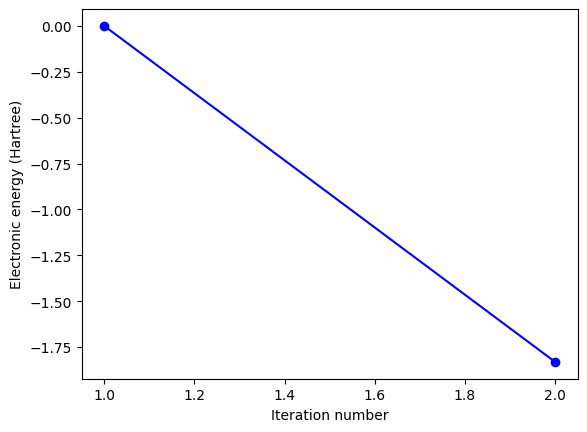

In [82]:
fig, axes = plt.subplots()
axes.plot(range(1,iter+1),enlist[:], 'bo-')
axes.set_xlabel("Iteration number")
axes.set_ylabel("Electronic energy (Hartree)")
plt.show()

And the density convergence through the iteractions.

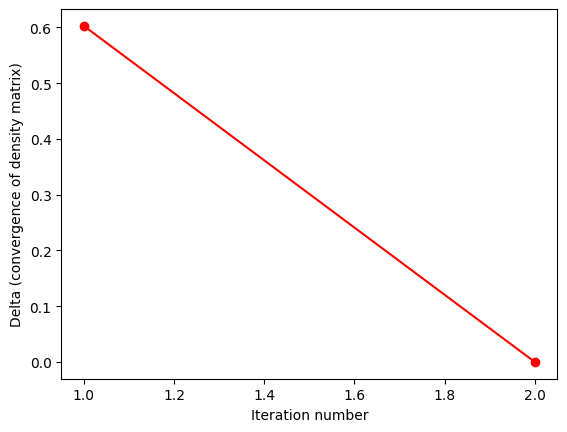

In [83]:
fig, axes = plt.subplots()
axes.plot(range(1,iter+1),deltaplist[:], 'ro-')
axes.set_xlabel("Iteration number")
axes.set_ylabel("Delta (convergence of density matrix)")
plt.show()

# Simple exersizes to try

You can easily modify some parameters in the code to see how it will affect the energy of the system. Make a change, then press the double arrow re-run button in the toolbar $\blacktriangleright\blacktriangleright$. This will restart the notebook with your new parameters. **Please, for the safety, always re-run all the cells (fully restart the kernel) if you make some changes.**

### There is a list of suggestions:

*   Try to use STO-2G or STO-1G basis set to see how the quality of basis set will change the total energy of the system toward the HF limit;
*   Change the molecule to H$_{2}$. For this, modify variables *ZA* and *R* in the molecule definition section & ZETA1 in basis set section;
*   Change convergence criteria to more strict (*crit* = 1e-5, 1e-7, 1e-10, etc.) and see how many SCF iterations are required in each case to converge density;
*   Try longer or shorter bond length between atoms and check how total energy of the system behaves. For example, the experimental equilibrium bond length in H$_{2}$ is 1.4 angstrom, but is it the same for this calculations?